In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))
import scipy.stats as stats
import env
from acquire import concat_csv_files
from prepare import prepare_df, create_features
from preprocessing import create_features, spotify_split

In [2]:
df = concat_csv_files()

### Summarize Data

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            5974 non-null   object 
 1   album             5974 non-null   object 
 2   release_date      5974 non-null   object 
 3   track_name        5974 non-null   object 
 4   track_id          5974 non-null   object 
 5   album_popularity  5974 non-null   int64  
 6   label             5974 non-null   object 
 7   danceability      5973 non-null   float64
 8   energy            5973 non-null   float64
 9   key               5973 non-null   float64
 10  loudness          5973 non-null   float64
 11  mode              5973 non-null   float64
 12  speechiness       5973 non-null   float64
 13  instrumentalness  5973 non-null   float64
 14  liveness          5973 non-null   float64
 15  valence           5973 non-null   float64
 16  tempo             5973 non-null   float64


In [5]:
df = prepare_df(df)

In [6]:
df = df.drop(columns=['album_popularity', 'album_id'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 6mecZbKK3JDeMdFRNxsCV5 to 2gVtrY8gCCynR9v0lyBL1m
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            5733 non-null   int64  
 1   release_month           5733 non-null   object 
 2   release_day             5733 non-null   object 
 3   artist                  5733 non-null   object 
 4   album                   5733 non-null   object 
 5   release_date            5733 non-null   object 
 6   track_name              5733 non-null   object 
 7   label                   5733 non-null   object 
 8   danceability            5733 non-null   float64
 9   energy                  5733 non-null   float64
 10  key                     5733 non-null   int64  
 11  loudness                5733 non-null   float64
 12  mode                    5733 non-null   int64  
 13  speechiness             5733 non-null   float64
 14  instru

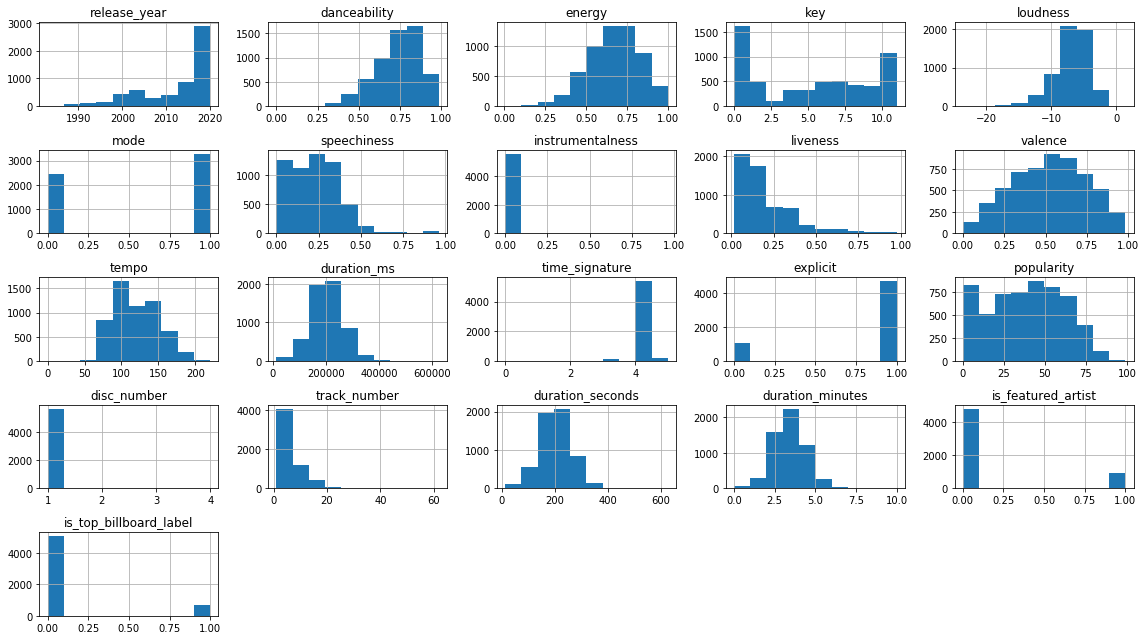

In [8]:
# distribution of variables
df.hist()
plt.tight_layout()

In [9]:
# value counts for all variables except 2
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

2020    1301
2019     564
2017     510
2018     505
2016     289
2014     241
2015     209
2005     179
2004     155
2012     139
2003     128
2013     124
1999     120
2001     118
2010     113
2007     107
2006     105
2000     102
2002     100
2011      83
1998      83
2009      66
2008      64
1997      61
1996      44
1994      41
1993      40
1995      37
1988      29
1990      26
1992      21
1986      12
1991       7
1987       4
1989       3
1985       2
1983       1
Name: release_year, dtype: int64 

01    858
11    613
10    593
09    535
08    456
05    430
03    411
07    405
04    401
06    388
12    377
02    266
Name: release_month, dtype: int64 

01    876
15    256
16    224
25    211
27    198
06    195
17    189
11    188
07    187
28    186
13    185
03    181
04    176
22    172
26    171
30    160
20    158
21    155
10    152
12    148
18    143
19    142
14    141
24    132
08    131
29    127
23    124
02    120
05    105
09    103
31     97
Name: release_day,

In [10]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')

Shape of train: (4012, 29) | Shape of validate: (861, 29) | Shape of test: (860, 29)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


In [11]:
train.head(3)

,release_year,release_month,release_day,artist,album,release_date,track_name,label,danceability,energy,...,explicit,popularity,disc_number,track_number,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,Lil Peep,0.585,0.471,...,1,87,1,1,single,142,2,0,2010s,0
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,Awful Records,0.833,0.518,...,1,24,1,11,album,120,2,0,2010s,0
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,Relativity Records,0.471,0.671,...,1,30,1,2,album,252,4,0,90s,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 30bqVoKjX479ab90a8Pafp to 70CYAL35X3T73qVStJNpZ2
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            4012 non-null   int64  
 1   release_month           4012 non-null   object 
 2   release_day             4012 non-null   object 
 3   artist                  4012 non-null   object 
 4   album                   4012 non-null   object 
 5   release_date            4012 non-null   object 
 6   track_name              4012 non-null   object 
 7   label                   4012 non-null   object 
 8   danceability            4012 non-null   float64
 9   energy                  4012 non-null   float64
 10  key                     4012 non-null   int64  
 11  loudness                4012 non-null   float64
 12  mode                    4012 non-null   int64  
 13  speechiness             4012 non-null   float64
 14  instru

In [13]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

In [14]:
#Continuous variable relationships with Popularity
#sns.pairplot(data=train[cont_vars + ['popularity']])
#plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
    <li>We may find some useful clusters since there is some spread in the variable relationships</li>
<li>There's no apparent linear relationships with popularity</li>
<li>more data is definitely needed</li>
<li>seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li>
</div>

---

In [15]:
#Categorical variable relationships with Popularity
#sns.pairplot(data=train[cat_vars + ['popularity']])
#plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
<li>popularity seems to decrease with disc number</li>
<li>a higher time signature seems to indicate higher popularity, namely '4'</li>
</div>

---

In [16]:
train.nunique()

release_year                37
release_month               12
release_day                 31
artist                    1167
album                     2221
release_date              1188
track_name                3739
label                     1086
danceability               595
energy                     693
key                         12
loudness                  3203
mode                         2
speechiness                995
instrumentalness          1246
liveness                  1062
valence                    934
tempo                     3681
duration_ms               3668
time_signature               5
explicit                     2
popularity                  97
disc_number                  4
track_number                30
album_type                   3
duration_seconds           348
duration_minutes            10
is_featured_artist           2
decade                       5
is_top_billboard_label       2
dtype: int64

<div class="alert alert-block alert-info">Takeaways<br><br>
    Categorical variables
    <li> key</li>
    <li> mode</li>
    <li> time_signature</li>
    <li> explicit</li>
    <li> decade</li>
        <br>
    Continuous variables
    <li> danceability</li>
    <li> energy</li>
    <li> loudness</li>
    <li> speechiness</li>
    <li> instrumentalness</li>
    <li> liveness</li>
    <li> valence</li>
    <li> tempo</li>
    <li> duration_ms</li>
    </div>

---

In [17]:
train.describe()

,release_year,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,...,duration_ms,time_signature,explicit,popularity,disc_number,track_number,duration_seconds,duration_minutes,is_featured_artist,is_top_billboard_label
count,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,...,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000
mean,2012.775424,0.737169,0.666814,5.274177,-6.957347,0.575274,0.233489,0.012939,0.203314,0.524615,...,204945.855184,3.988784,0.817049,38.331505,1.007228,5.535892,204.472832,2.921735,0.159521,0.120638
std,8.120826,0.133315,0.154437,3.757429,2.788502,0.494363,0.145442,0.082714,0.160667,0.219001,...,60866.673233,0.319130,0.386675,22.899992,0.103287,5.002015,60.852504,1.048253,0.366207,0.325747
min,1983.000000,0.000000,0.061700,0.000000,-23.606000,0.000000,0.000000,0.000000,0.019300,0.000000,...,13853.000000,0.000000,0.000000,0.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000
25%,2007.000000,0.656750,0.563000,1.000000,-8.322000,0.000000,0.109000,0.000000,0.097600,0.360000,...,165226.750000,4.000000,1.000000,21.000000,1.000000,1.000000,165.000000,2.000000,0.000000,0.000000
50%,2017.000000,0.757000,0.676000,6.000000,-6.571500,1.000000,0.229000,0.000000,0.138000,0.534000,...,202619.000000,4.000000,1.000000,40.000000,1.000000,4.000000,202.000000,3.000000,0.000000,0.000000
75%,2019.000000,0.839000,0.782000,9.000000,-5.129500,1.000000,0.324000,0.000024,0.273250,0.692250,...,243247.500000,4.000000,1.000000,56.000000,1.000000,8.000000,243.000000,4.000000,0.000000,0.000000
max,2020.000000,0.986000,0.993000,11.000000,-0.067000,1.000000,0.962000,0.962000,0.964000,0.982000,...,560933.000000,5.000000,1.000000,99.000000,4.000000,62.000000,560.000000,9.000000,1.000000,1.000000


<div class="alert alert-block alert-info">Takeaways: 
<li> We may find some useful clusters since there is some spread in the variable relationships</li>
<li> There's no apparent linear relationships with popularity</li>
<li> more data is definitely needed</li>
<li> seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li></div>

In [18]:
train.head()

,release_year,release_month,release_day,artist,album,release_date,track_name,label,danceability,energy,...,explicit,popularity,disc_number,track_number,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,Lil Peep,0.585,0.471,...,1,87,1,1,single,142,2,0,2010s,0
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,Awful Records,0.833,0.518,...,1,24,1,11,album,120,2,0,2010s,0
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,Relativity Records,0.471,0.671,...,1,30,1,2,album,252,4,0,90s,0
08EabdvPIHC4KBW7LfynPP,1993,10,12,salt-n-pepa,very necessary,1993-10-12,no one does it better,Mercury Records,0.874,0.507,...,0,26,1,2,album,234,3,0,90s,0
6B2ZDVgJ0lHLgV9xC2PAJh,2001,10,22,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),Arista,0.857,0.808,...,1,23,1,9,album,266,4,1,2000s,0


---
# Correlation Tests: Linear correlation with Popularity

In [19]:
train.corr()['popularity'].sort_values(ascending=False)

popularity                1.000000
release_year              0.200725
explicit                  0.155710
is_featured_artist        0.145134
is_top_billboard_label    0.123446
loudness                  0.117666
danceability              0.110103
tempo                     0.065197
mode                      0.013519
time_signature           -0.002630
key                      -0.015472
instrumentalness         -0.024588
disc_number              -0.025468
valence                  -0.054775
duration_minutes         -0.057558
liveness                 -0.062220
duration_ms              -0.065631
duration_seconds         -0.065726
energy                   -0.078634
speechiness              -0.125231
track_number             -0.141257
Name: popularity, dtype: float64

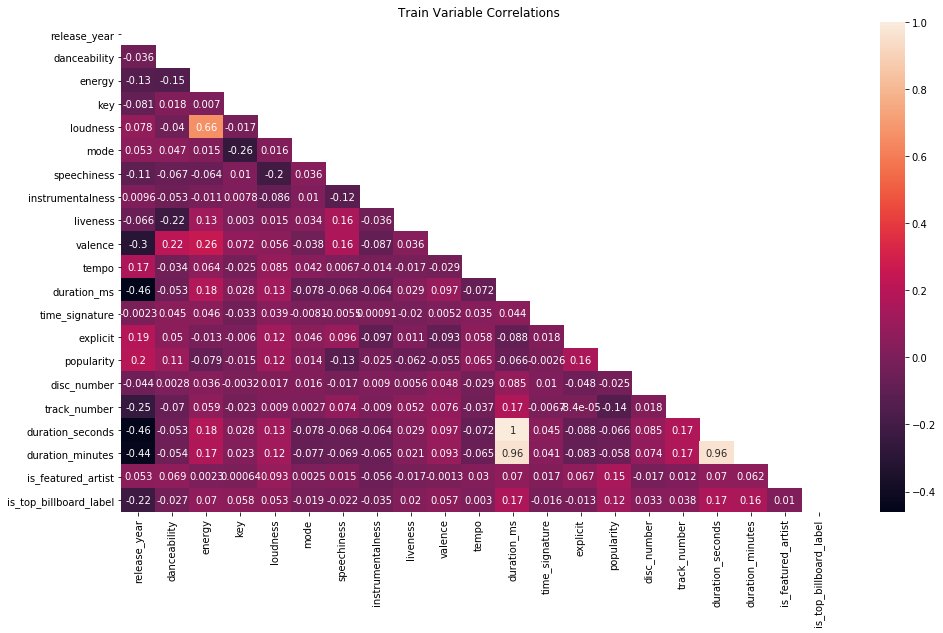

In [20]:
plt.title('Train Variable Correlations')
plt.rc('figure', figsize=(16,9))
sns.heatmap(train.corr(), annot=True, mask= np.triu(np.ones_like(train.corr(), dtype=np.bool)))

> **Does liveness have any correlation with a song's popularity?**

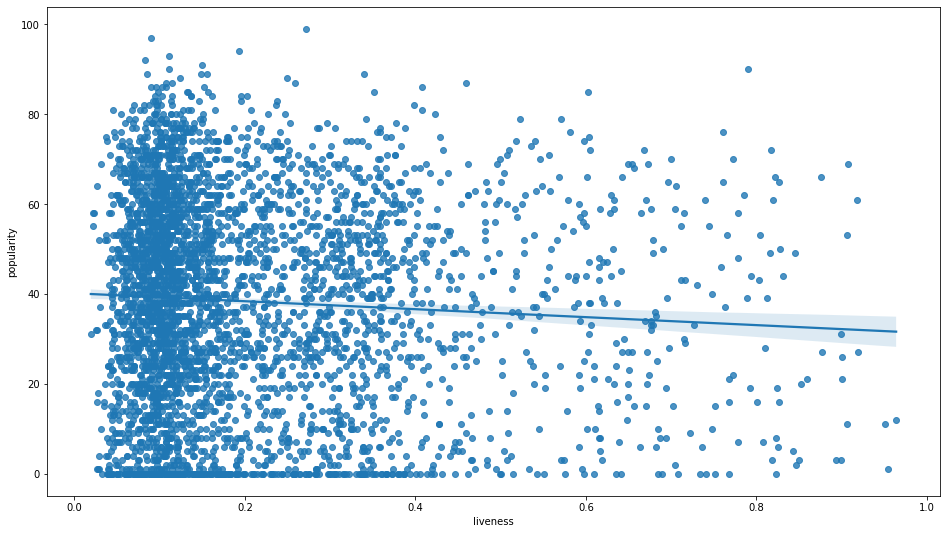

In [21]:
sns.regplot(x='liveness', y='popularity', data=train)

- $H_0$: There is no linear relationship between liveness and popularity.
- $H_a$: There is a linear relationship between liveness and popularity.

In [22]:
null = 'there is no linear relationship between liveness and popularity'

x = train.liveness
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.06221976259782727
p = 8.026259788409192e-05
We reject the null that there is no linear relationship between liveness and popularity


<div class="alert alert-block alert-info">Conclusion: Liveness and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

> **Does song length have any correlation with a song's popularity?**

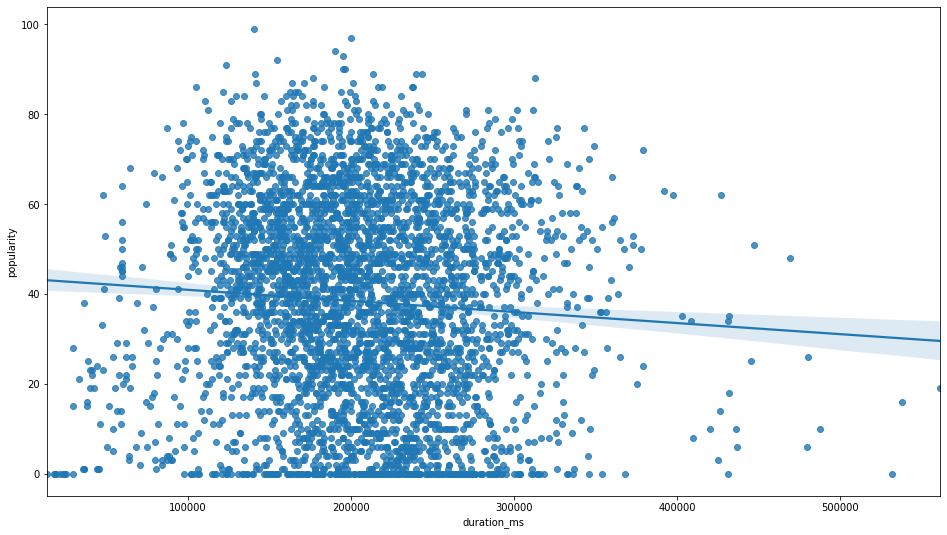

In [23]:
sns.regplot(x='duration_ms', y='popularity', data=train)

- $H_0$: There is no linear relationship between song length and popularity.
- $H_a$: There is a linear relationship between song length and popularity.

In [24]:
null = 'there is no linear relationship between song length and popularity'

x = train.duration_ms
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.06563106450305413
p = 3.17850692970867e-05
We reject the null that there is no linear relationship between song length and popularity


<div class="alert alert-block alert-info">Conclusion: Song length and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

# T-Tests: Comparing Mean Popularity

> **Is the mean popularity of songs with time signature 4 significantly greater than the mean popularity of all songs(within the train data)?**

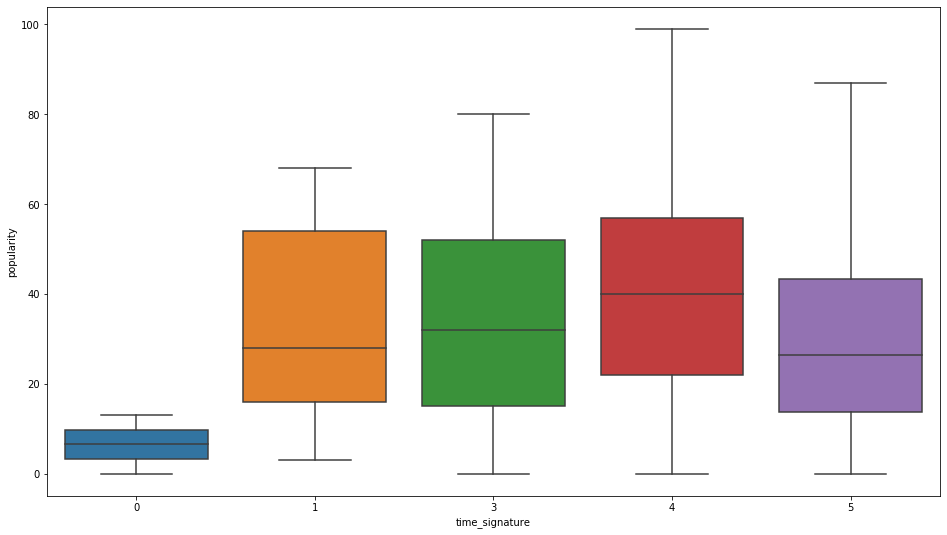

In [25]:
sns.boxplot(x='time_signature', y='popularity', data=train)

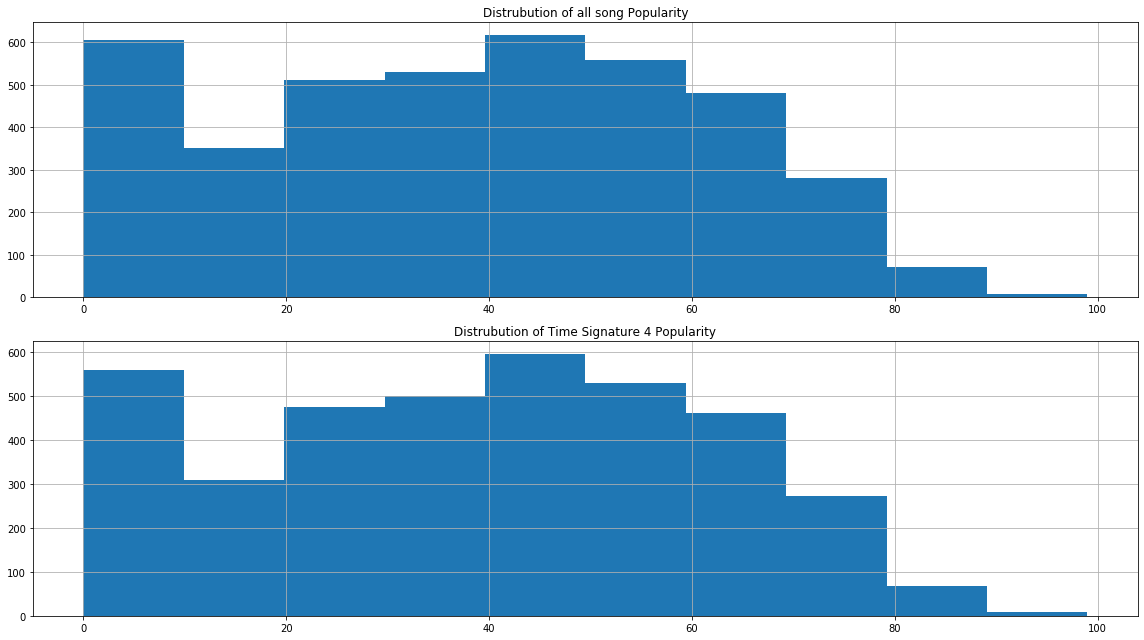

In [26]:
plt.subplot(211)
plt.title('Distrubution of all song Popularity')
train.popularity.hist()

plt.subplot(212)
plt.title('Distrubution of Time Signature 4 Popularity')
train[train.time_signature == 4].popularity.hist(label='time sig 4')
plt.tight_layout()

In [27]:
train.time_signature.value_counts()

4    3777
5     116
3      99
1      18
0       2
Name: time_signature, dtype: int64

**Hypothesis**

$H_{0}$: Mean of popularity of time signature 4 =< Mean of popularity of all songs

$H_{a}$: Mean of popularity of time signature 4 > Mean of popularity of all songs

In [28]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

sample = train[train.time_signature == 4].popularity
overall = train.popularity.mean()

alpha = .05

t, p = stats.ttest_1samp(sample, overall)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Overall mean', overall, '\n Sample mean', sample.mean())

t = 1.247183145545426
p = 0.21240770005665496
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Overall mean 38.33150548354935 
 Sample mean 38.79613449827906


<div class="alert alert-block alert-info">Conclusion: The mean popularity of time signature 4 is not significantly greater than the overall mean popularity</div>

---

> **Do tracks in a major key tend to be more popular than tracks in a minor key?**

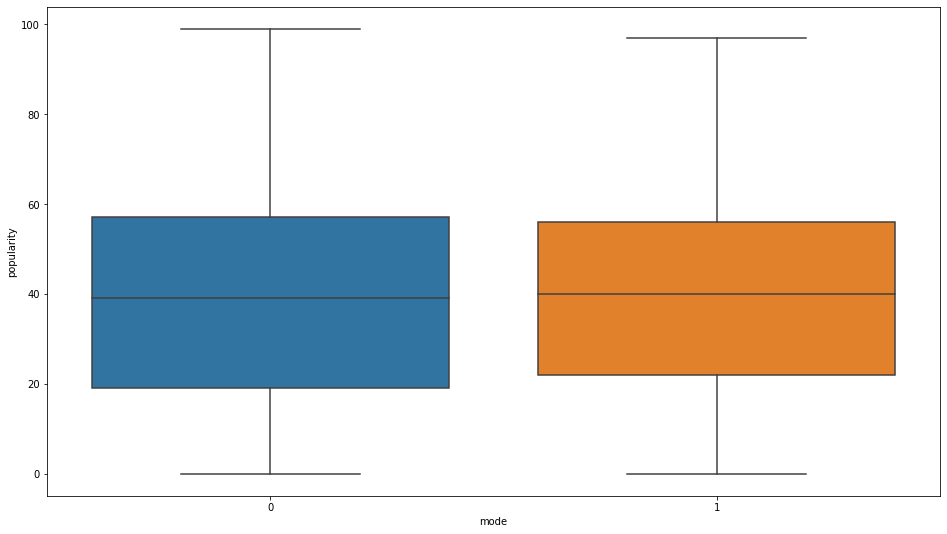

In [29]:
sns.boxplot(x='mode', y='popularity', data=train)

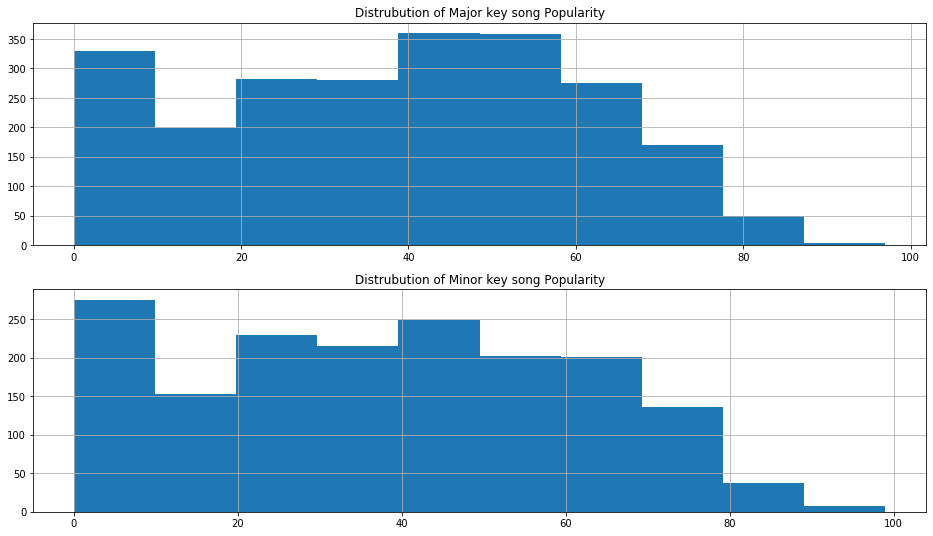

In [30]:
plt.subplot(211)
plt.title('Distrubution of Major key song Popularity')
train[train['mode'] == 1].popularity.hist()
plt.subplot(212)
plt.title('Distrubution of Minor key song Popularity')
train[train['mode'] == 0].popularity.hist()

In [31]:
train['mode'].value_counts()

1    2308
0    1704
Name: mode, dtype: int64

In [32]:
print(train[train['mode'] == 1].popularity.var())
print(train[train['mode'] == 0].popularity.var())

497.3467990570484
561.1530187683157


**Hypothesis**

$H_{0}$: Mean of popularity of major key songs =< Mean of popularity of minor key songs

$H_{a}$: Mean of popularity of major key songs > Mean of popularity of minor key songs

In [33]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

major = train[train['mode'] == 1].popularity
minor = train[train['mode'] == 0].popularity

alpha = .05

t, p = stats.ttest_ind(major, minor)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Major mean', major.mean()) 
print('Minor mean', minor.mean())

t = 0.8561803187219806
p = 0.39194920450672244
We fail to reject the null that the mean of popularity of time signature 4 =< mean of popularity of all songs
Major mean 38.5974870017331
Minor mean 37.9712441314554


<div class="alert alert-block alert-info">Conclusion: The mean popularity of major key songs is not significantly greater than the mean popularity of minor key songs </div>

---

In [34]:
bin_labels = [1, 2]
train['popularity_bin'] = pd.qcut(train['popularity'], q=2, precision=0, labels=bin_labels)

In [35]:
train.nunique()

release_year                37
release_month               12
release_day                 31
artist                    1167
album                     2221
release_date              1188
track_name                3739
label                     1086
danceability               595
energy                     693
key                         12
loudness                  3203
mode                         2
speechiness                995
instrumentalness          1246
liveness                  1062
valence                    934
tempo                     3681
duration_ms               3668
time_signature               5
explicit                     2
popularity                  97
disc_number                  4
track_number                30
album_type                   3
duration_seconds           348
duration_minutes            10
is_featured_artist           2
decade                       5
is_top_billboard_label       2
popularity_bin               2
dtype: int64

In [36]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

In [37]:
# plots 4 visuals with histogram of dist for a cont var for low/high popularity
# and bar plot/ box plot with distribution
def plot_cont_pop(train, cont):
    plt.rc('figure', figsize=(16,9))

    plt.subplot(221)
    plt.title(f'Distrubution of {cont} in Low Popularity')
    train[train.popularity_bin == 1][cont].hist()

    plt.subplot(222)
    plt.title(f'Distrubution of {cont} in High Popularity')
    train[train.popularity_bin == 2][cont].hist()

    plt.subplot(223)
    plt.title(f'Distrubution of {cont} by Popularity')
    sns.boxplot(x='popularity_bin', y=cont, data=train)

    plt.subplot(224)
    plt.title(f'Distrubution of {cont} by Popularity')
    sns.barplot(x='popularity_bin', y=cont, data=train, palette='Purples')
    plt.xlabel('popularity_bin')
    plt.ylabel(cont)

In [38]:
#runs a two sample t test
def two_sample_ttest(h_vs_l,train, cont):
    null = f'the mean of {cont} of high popularity {h_vs_l} mean {cont} of low popularity'

    high = train[train['popularity_bin'] == 2][cont]
    low = train[train['popularity_bin'] == 1][cont]

    alpha = .05

    t, p = stats.ttest_ind(low, high)
    print('t =', t)
    print('p =', p)

    if p/2 > alpha:
        print('We fail to reject the null that', null)
    elif t < 0:
        print('We fail to reject the null that', null)
    else:
        print('We reject the null that', null)

    print(f'High Popularity {cont} mean', high.mean())
    print(f'Low Popularity {cont} mean', low.mean())

In [39]:
#plot_cont_pop(train, 'danceability')

In [40]:
#plot_cont_pop(train, 'energy')

In [41]:
#plot_cont_pop(train, 'loudness')

In [42]:
#plot_cont_pop(train, 'valence')

In [43]:
#plot_cont_pop(train, 'tempo')

---
### Duration (ms)
> Is the mean **duration** in the Low popularity group significantly different than the mean **duration** of High popularity group?

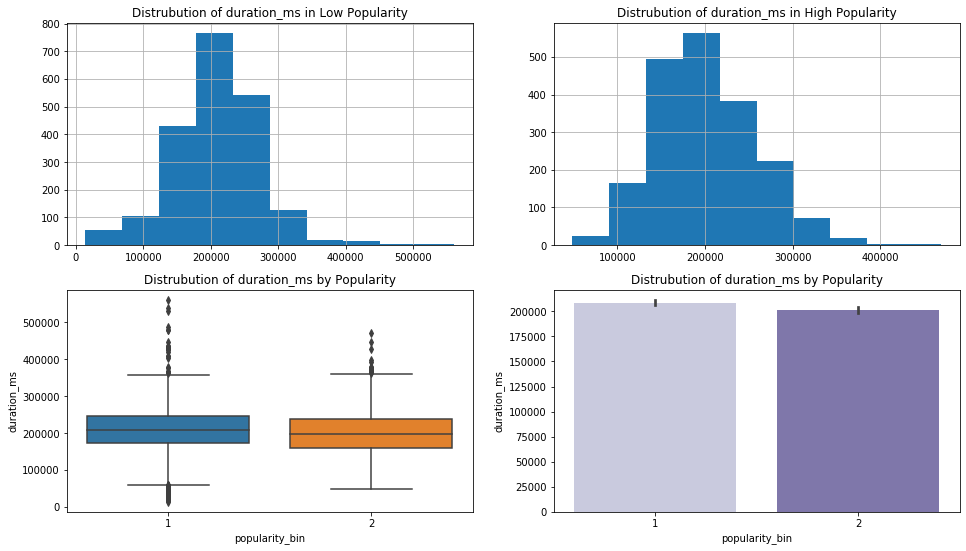

In [69]:
plot_cont_pop(train, 'duration_ms')

**Hypothesis**

$H_{0}$: Mean duration in the Low popularity group = Mean duration of High popularity group

$H_{a}$: Mean duration in the Low popularity group != Mean duration of High popularity group

In [70]:
cont = 'duration_ms'
l_vs_h = 'equal to'

In [71]:
null = f'the mean of {cont} of Low popularity {l_vs_h} mean {cont} of High popularity'

high = train[train['popularity_bin'] == 2][cont]
low = train[train['popularity_bin'] == 1][cont]

alpha = .05

t, p = stats.ttest_ind(low, high)
print('t =', t)
print('p =', p, '\n')

if p > alpha:
    print('We fail to reject the null that', null, '\n')
else:
    print('We reject the null that', null, '\n')

print(f'High Popularity {cont} mean', round(high.mean(), 2))
print(f'Low Popularity {cont} mean', round(low.mean(), 2))

t = 3.790422507495743
p = 0.00015260111015639639 

We reject the null that the mean of duration_ms of Low popularity equal to mean duration_ms of High popularity 

High Popularity duration_ms mean 201204.68
Low Popularity duration_ms mean 208480.29


**Conclusion**: The mean *duration* of Low popularity songs **ARE** statistically significantly different than the mean *duration* of High popularity songs

---

### Instrumentalness
> Is the mean **instrumentalness** in the Low popularity group significantly different than the mean **instrumentalness** of High popularity group?

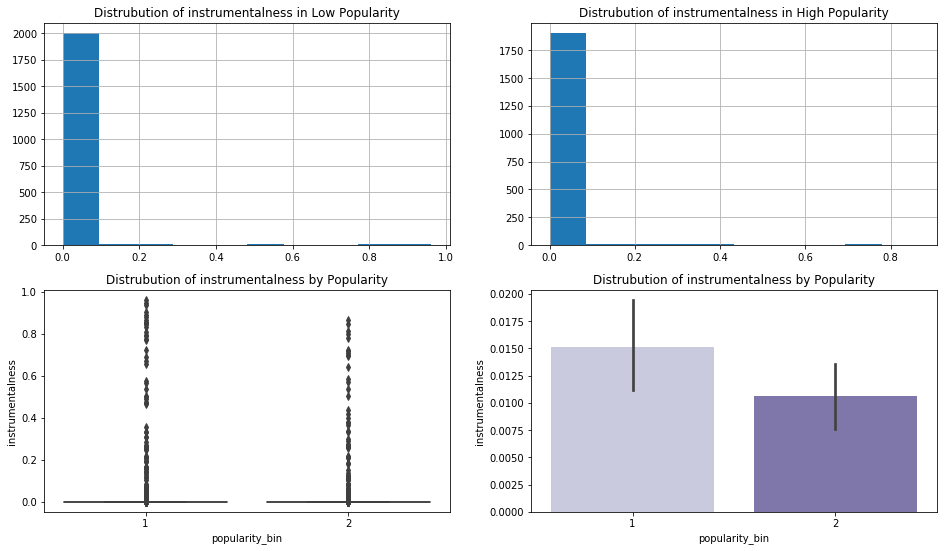

In [72]:
plot_cont_pop(train, 'instrumentalness')

**Hypothesis**

$H_{0}$: Mean instrumentalness in the Low popularity group = Mean instrumentalness of High popularity group

$H_{a}$: Mean instrumentalness in the Low popularity group != Mean instrumentalness of High popularity group

In [73]:
cont = 'instrumentalness'
l_vs_h = 'equal to'

In [74]:
null = f'the mean of {cont} of Low popularity {l_vs_h} mean {cont} of High popularity'

high = train[train['popularity_bin'] == 2][cont]
low = train[train['popularity_bin'] == 1][cont]

alpha = .05

t, p = stats.ttest_ind(low, high)
print('t =', t)
print('p =', p, '\n')

if p > alpha:
    print('We fail to reject the null that', null, '\n')
else:
    print('We reject the null that', null, '\n')

print(f'High Popularity {cont} mean', round(high.mean(), 4))
print(f'Low Popularity {cont} mean', round(low.mean(), 4))

t = 1.7463611238142098
p = 0.0808247896539987 

We fail to reject the null that the mean of instrumentalness of Low popularity equal to mean instrumentalness of High popularity 

High Popularity instrumentalness mean 0.0106
Low Popularity instrumentalness mean 0.0152


**Conclusion**: The mean *instrumentalness* of Low popularity songs are **NOT** statistically significantly different than the mean *instrumentalness* of High popularity songs

---
### Speechiness
> Is the mean **speechiness** in the Low popularity group significantly different than the mean **speechiness** of High popularity group?

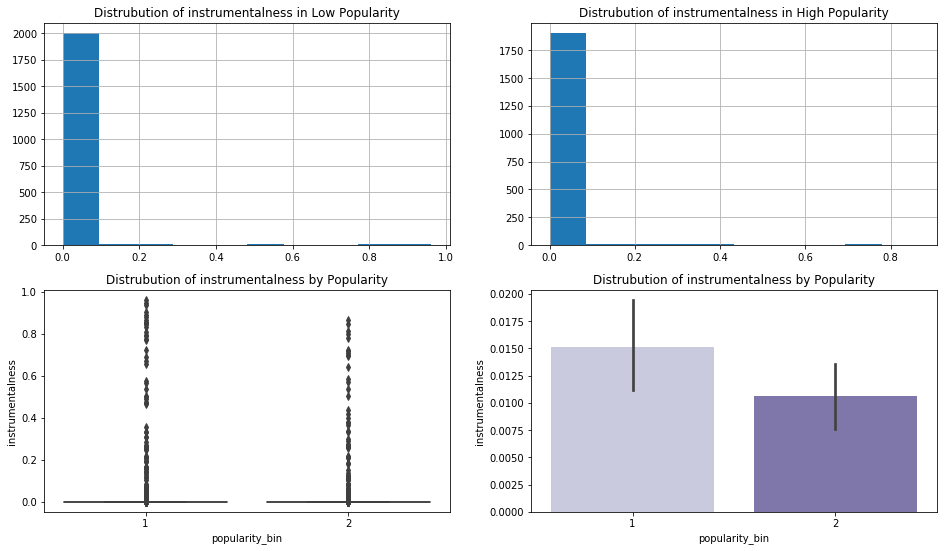

In [72]:
plot_cont_pop(train, 'speechiness')

**Hypothesis**

$H_{0}$: Mean speechiness in the Low popularity group = Mean speechiness of High popularity group

$H_{a}$: Mean speechiness in the Low popularity group != Mean speechiness of High popularity group

In [75]:
cont = 'speechiness'
l_vs_h = 'equal to'

In [76]:
null = f'the mean of {cont} of Low popularity {l_vs_h} mean {cont} of High popularity'

high = train[train['popularity_bin'] == 2][cont]
low = train[train['popularity_bin'] == 1][cont]

alpha = .05

t, p = stats.ttest_ind(low, high)
print('t =', t)
print('p =', p, '\n')

if p > alpha:
    print('We fail to reject the null that', null, '\n')
else:
    print('We reject the null that', null, '\n')

print(f'High Popularity {cont} mean', round(high.mean(), 4))
print(f'Low Popularity {cont} mean', round(low.mean(), 4))

t = 6.360533068281668
p = 2.2360993221168286e-10 

We reject the null that the mean of speechiness of Low popularity equal to mean speechiness of High popularity 

High Popularity speechiness mean 0.2185
Low Popularity speechiness mean 0.2476


**Conclusion**: The mean *speechiness* of Low popularity songs **ARE** statistically significantly different than the mean *speechiness* of High popularity songs

---
### Liveness
> Is the mean **liveness** in the Low popularity group significantly different than the mean **liveness** of High popularity group?

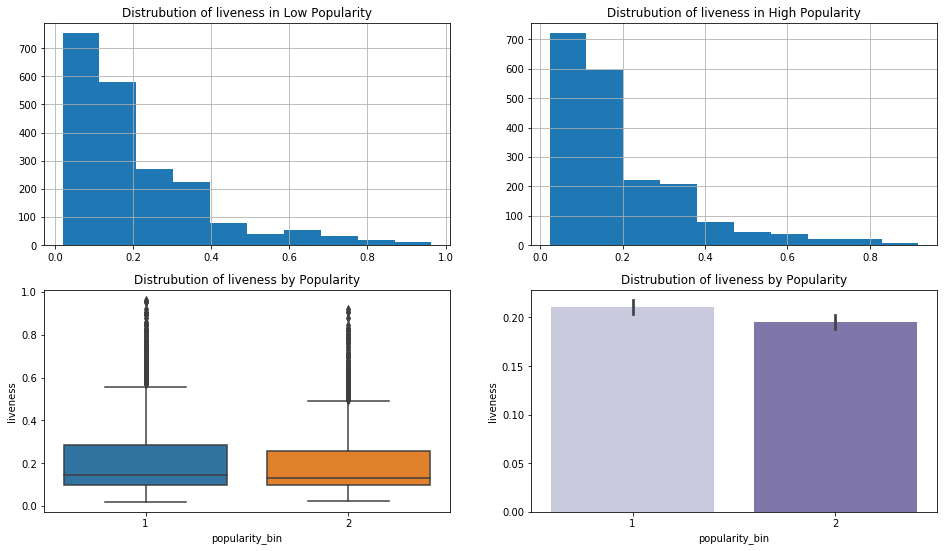

In [77]:
plot_cont_pop(train, 'liveness')

**Hypothesis**

$H_{0}$: Mean liveness in the Low popularity group = Mean liveness of High popularity group

$H_{a}$: Mean liveness in the Low popularity group != Mean liveness of High popularity group

In [80]:
cont = 'liveness'
l_vs_h = 'equal to'

In [81]:
null = f'the mean of {cont} of Low popularity {l_vs_h} mean {cont} of High popularity'

high = train[train['popularity_bin'] == 2][cont]
low = train[train['popularity_bin'] == 1][cont]

alpha = .05

t, p = stats.ttest_ind(low, high)
print('t =', t)
print('p =', p, '\n')

if p > alpha:
    print('We fail to reject the null that', null, '\n')
else:
    print('We reject the null that', null, '\n')

print(f'High Popularity {cont} mean', round(high.mean(), 4))
print(f'Low Popularity {cont} mean', round(low.mean(), 4))

t = 2.9270415154535523
p = 0.0034412702949354656 

We reject the null that the mean of liveness of Low popularity equal to mean liveness of High popularity 

High Popularity liveness mean 0.1957
Low Popularity liveness mean 0.2105


**Conclusion**: The mean *liveness* of Low popularity songs **ARE** statistically significantly different than the mean *liveness* of High popularity songs

---
### Loudness
> Is the mean **loudness** in the Low popularity group significantly different than the mean **loudness** of High popularity group?

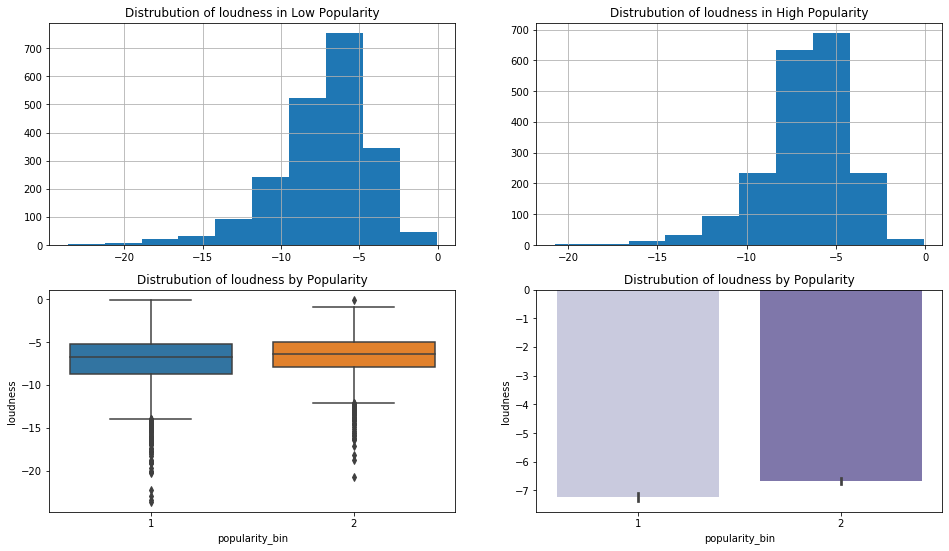

In [82]:
plot_cont_pop(train, 'loudness')

**Hypothesis**

$H_{0}$: Mean loudness in the Low popularity group = Mean loudness of High popularity group

$H_{a}$: Mean loudness in the Low popularity group != Mean loudness of High popularity group

In [83]:
cont = 'loudness'
l_vs_h = 'equal to'

In [84]:
null = f'the mean of {cont} of Low popularity {l_vs_h} mean {cont} of High popularity'

high = train[train['popularity_bin'] == 2][cont]
low = train[train['popularity_bin'] == 1][cont]

alpha = .05

t, p = stats.ttest_ind(low, high)
print('t =', t)
print('p =', p, '\n')

if p > alpha:
    print('We fail to reject the null that', null, '\n')
else:
    print('We reject the null that', null, '\n')

print(f'High Popularity {cont} mean', round(high.mean(), 4))
print(f'Low Popularity {cont} mean', round(low.mean(), 4))

t = -6.731507875365123
p = 1.917265048009e-11 

We reject the null that the mean of loudness of Low popularity equal to mean loudness of High popularity 

High Popularity loudness mean -6.6541
Low Popularity loudness mean -7.2438


**Conclusion**: The mean *loudness* of Low popularity songs **ARE** statistically significantly different than the mean *loudness* of High popularity songs

Variables to T-Test
- duration_ms
- liveness
- instrumentalness
- speechiness
- loudness